Code taken from:
https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [1]:
!pip -q install librosa 

distutils: /Users/TL/.pyenv/versions/3.8.5/include/python3.8/UNKNOWN
sysconfig: /Users/TL/.pyenv/versions/3.8.5/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Users/TL/.pyenv/versions/3.8.5/include/python3.8/UNKNOWN
sysconfig: /Users/TL/.pyenv/versions/3.8.5/include/python3.8
user = False
home = None
root = None
prefix = None


In [2]:
import librosa

In [3]:
audio_path = '../resources/test_audio.wav'
x, sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [4]:
librosa.load(audio_path, sr=16_000)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 16000)

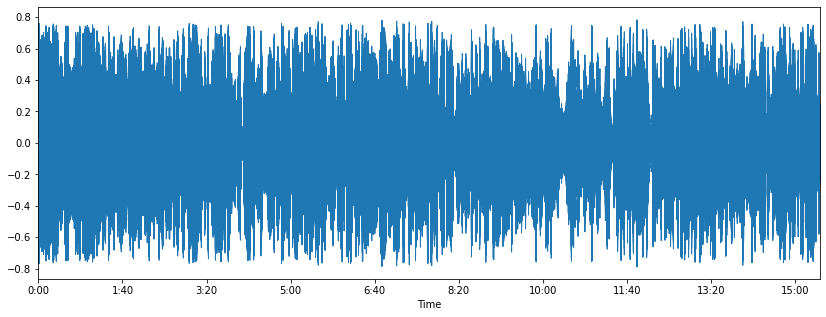

In [5]:
# display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Zero Crossing Rate

In [6]:
zero_crossings = librosa.zero_crossings(x[0:], pad=False)
print(sum(zero_crossings))

2461388


### Spectral Centroid

In [7]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(40035,)

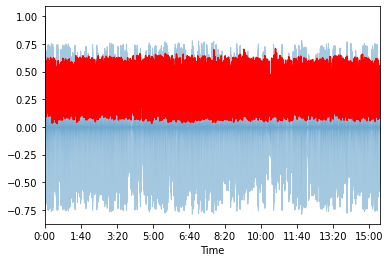

In [8]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### MFCCs

(20, 40035)


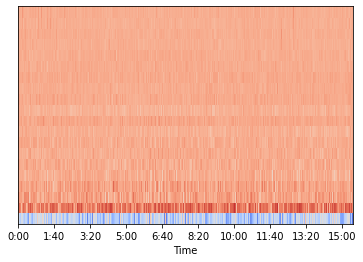

In [9]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')